In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math

sns.set(rc={'figure.figsize': (12,8)})

# Clase 2

## Estadística

**Población**: conjunto de eventos o individuos que son de interés para un determinado experimento o al realizar una hipótesis

**Muestra**: subconjunto de una población

Ej: - Queremos saber como se distribuyen las edades de las personas en una ciudad de N habitantes y hacemos una encuesta a n personas (n<N) que caminan por la calle. La población de nuestro interés son todos los N habitantes de la ciudad. Nuestra muestra son los n habitantes que encuestamos en la calle.


### Distribuciones de probabilidad

Para los valores posible de un experimento se tienen la probabilidad de ocurrencia del mismo.

Ej: número de clientes que llegan a un mostrador dentro de una ventana dada de tiempo siguen la [distribución de poisson](https://es.wikipedia.org/wiki/Distribución_de_Poisson):

$$P(k) =  \frac{\lambda^{k} e^{-\lambda}}{k!} \\
k: \text{número de clientes que llegan} \\
\lambda: \text{tasa de llegada de los clientes}$$

Esta distribución tiene las siguientes propiedades:

$$ \mu_{poisson} = \lambda \\
\sigma_{poisson}^2 = \lambda$$

Por ejemplo, para $$\lambda = 15 \text{ clientes por hora}$$

In [6]:
k = np.arange(1, 35)
lambda_ = 15
distribucion = [np.power(lambda_, k_i)*np.exp(-lambda_)/np.math.factorial(k_i) for k_i in k]

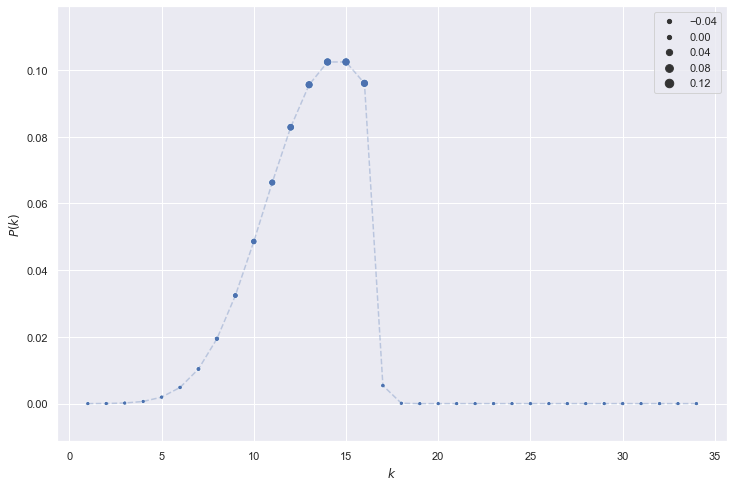

In [7]:
ax = sns.scatterplot(k, distribucion, size=distribucion)
ax.set_xlabel('$k$')
ax.set_ylabel('$P(k)$')
ax.plot(k, distribucion, '--', alpha=0.3);

### Propiedades de una distribución de probabilidad


**Valor medio**: valor al que tiende la variable en cuestión. Se calcula como: $$\sum_{i} x_i * P(x_i)$$ En nuestro ejemplo es 15.

**Varianza**: medida de cuan dispersa es la variable (línea en el gráfico). En nuestro caso también es 15. 
\
Particularmente la distribución de poisson tiene la particularidad que la varianza y el valor medio son iguales y son igual a $\lambda$.

### Medidas de tendencia central y dispersión

Intentan medir la tendencia de un grupo de datos y cuan dispersos se encuentran. Los principales y más utilizados son:

**Media aritmética o promedio**: la tendencia de la media de los datos, da la idea de valor medio,.

**Moda**: es el valor con mayor frecuencia en los datos.

**Mediana**: posición central en un conjunto de datos ordenados.

**Varianza**: medida de disperción de los datos

Ej: generamos 1000 puntos de una distribución normal, con media 0 y varianza 1.
    Graficamos el histograma normalizado: dividiendo los valores obtenidos en intervalos y contando cuantos valores caen dentro de dicho intervalo respecto al total de valores obtenidos

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


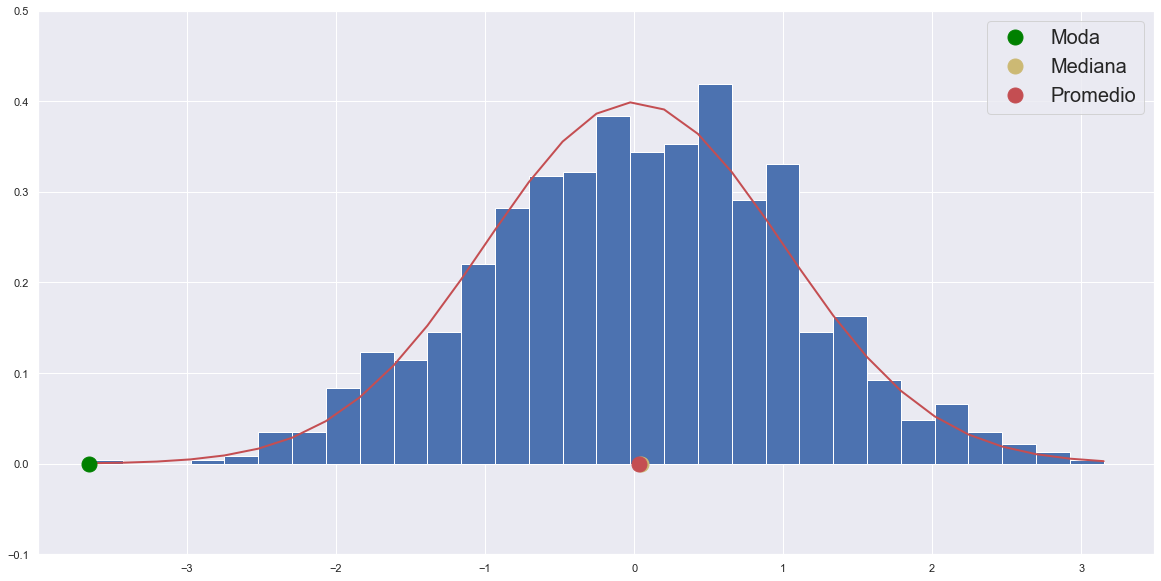

In [8]:
mu = 0
sigma = 1
s = np.random.normal(mu, sigma, 1000)
plt.figure(figsize=(20,10))
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
moda =  stats.mode(s)
plt.ylim(-0.1,0.5)
plt.plot(moda[0][0], 0, "o", color="green", markersize = 15, label='Moda')
plt.plot(np.median(s), 0, "oy", markersize = 15, label='Mediana')
plt.plot(np.mean(s), 0, "or", markersize = 15, label='Promedio')
plt.legend(fontsize=20)
plt.show()

La media y la mediana (vista como el valor "del medio") parecieran tener el mismo comportamiento, sin embargo en caso de tener outlayers, es decir, datos que por alguna razón se "alejan" de la gran mayoría, la mediana es mejor medida de la tendencia media de los datos.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


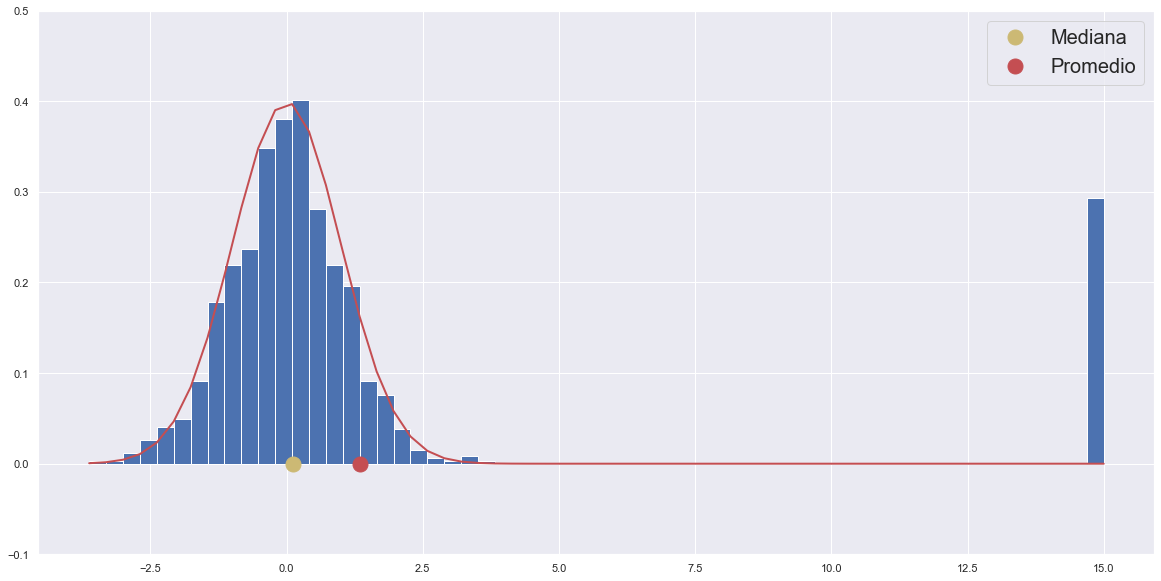

In [12]:
mu = 0
sigma = 1
s = np.random.normal(mu, sigma, 1000)
s = np.append(s,[15]*100)
plt.figure(figsize=(20,10))
count, bins, ignored = plt.hist(s, 60, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
moda =  stats.mode(s)
plt.ylim(-0.1,0.5)
plt.plot(np.median(s), 0, "oy", markersize = 15, label="Mediana")
plt.plot(np.mean(s), 0, "or", markersize = 15, label="Promedio")
plt.legend(fontsize=20)
plt.show()

Por lo que la mediana no se ve afectada por valores atípicos.

**Inferencia estadística**: usar los datos para estimar alguna propiedad o parámetro de la distribución de probabilidad suyacente, es decir, usar los datos de muestreo para determinar propiedades de la población. A la propiedad estimada se la suele llamar **estadístico** y si se usa la propiedad es para estimar algún parámetro específico de la distribucíon de la población de suele llamar **estimadores**.

ej: Se tiene un dado con la siguiente distribución de probabilidad:

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salida del dado')

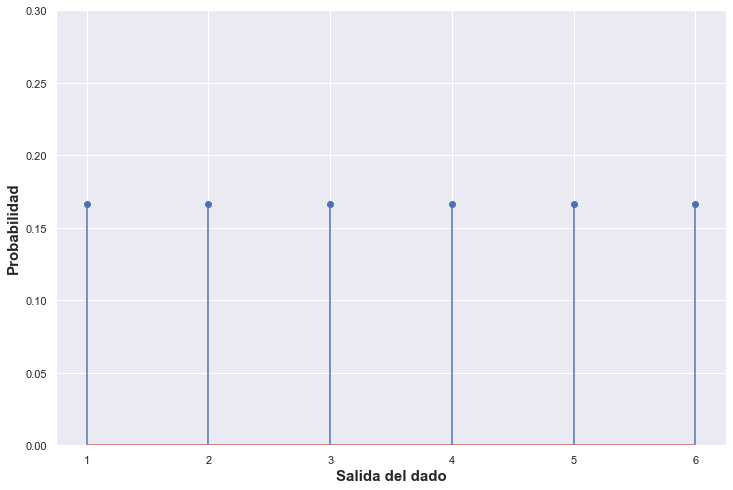

In [15]:
numero_obtenido = [ 1, 2, 3, 4, 5, 6]
probabilidad = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
plt.stem(numero_obtenido, probabilidad)
plt.ylim(0,0.3)
plt.ylabel('Probabilidad', fontsize=15, weight='bold')
plt.xlabel('Salida del dado', fontsize=15, weight='bold')

Observando la distribución, el valor medio es: 

$$\sum_{i} x_i * P(x_i) = \frac{1}{6}*1 + \frac{1}{6}*2 + \frac{1}{6}*3 + \frac{1}{6}*4 + \frac{1}{6}*5 + \frac{1}{6}*6 = 3.5$$

Por el contrario, supongamos que no sabemos nada de la distribución de probabilidad y solo tenemos el dado. Lo tiramos 1000 veces y obtenemos el siguiente histograma:

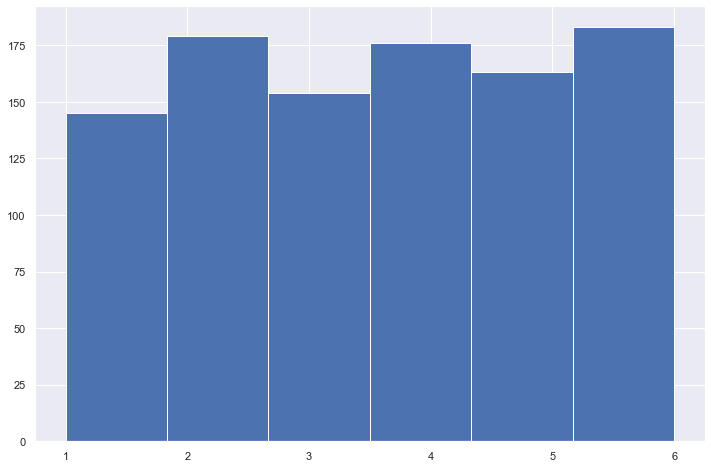

In [14]:
x=[math.ceil(i) for i in np.random.rand(1000)*6]
frecuencia, bins, _  = plt.hist(x,6)


Calculamos el promedio de los datos obtenidos: $$\frac{1}{100}\sum^{100}_{i=1} x_i$$

In [111]:
np.mean(x)

3.511

Se observa que este valor es cercano al valor 3.5 del valor medio de la distribución, por lo que el promedio es un estimador del valor medio, notando que se usaron valores del experimento para estimar una propiedad de la distribución.

# Pandas

In [4]:
import pandas as pd

- Una _serie_ de Pandas es un array unidimensional *indexado*.

In [5]:
serie = pd.Series([1,2,3,4])
serie

0    1
1    2
2    3
3    4
dtype: int64

- La serie tiene tanto el array de datos que pasamos como un conjunto de índices.
- Como no los especificamos, los índices toman el valor default empezando a contar desde cero.
- Los valores de la serie son simplemente un `numpy array`.
- El índice es un objeto de tipo `pd.Index`.
- Los valores de una serie se pueden manipular igual que un `numpy array`.

In [6]:
# Valores subyacentes de una serie
serie.values

array([1, 2, 3, 4])

In [7]:
# Índice de una serie
serie.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
serie[1]

2

In [6]:
serie[0:2]

0    1
1    2
dtype: int64

El índice de las series es lo que las diferencia de un array de numpy. Estos pueden tomar valores de muchos tipos, por ejemplo fechas.

In [8]:
# Creamos un índice de fechas vía pandas y creamos la misma serie pero ahora con este nuevo índice
index = pd.DatetimeIndex(['2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08'])
data = pd.Series([1,2,3,4], index = index)
data

2020-05-05    1
2020-05-06    2
2020-05-07    3
2020-05-08    4
dtype: int64

In [8]:
# El slicing funciona con fechas, i.e, pandas entiende el orden usual de fechas
data['2020-05-05' : '2020-05-07']

2020-05-05    1
2020-05-06    2
2020-05-07    3
dtype: int64

In [12]:
# Se puede usar el orden para filtrar fechas
mascara = data.index < '2020-05-07'

In [13]:
data[mascara]

2020-05-05    1
2020-05-06    2
dtype: int64

- Un _DataFrame_ es una tabla (array bidimensional)
- Cada columna de la tabla es una serie de Pandas
- Todas las columnas comparten el mismo índice
- Típicamente uno lee datos (por ejemplo, en `.csv`) y los guarda en un df

### Exploración de datos

In [4]:
df = pd.read_csv('data_stocks.csv', parse_dates = ['date'], index_col = 'date')

In [5]:
# Muestra las primeras 5 entradas del df
df.head()

,symbol,adjClose,volume
date,,,
2017-01-03,VOO,194.997818,4750181.0
2017-01-03,TUR,28.437589,769510.0
2017-01-03,VNQI,42.517267,512706.0
2017-01-04,VNQI,43.080071,468586.0
2017-01-04,TUR,28.482857,340208.0


In [6]:
# Summary statistics de las columnas (numéricas) del df
df.describe()

,adjClose,volume
count,287.000000,2.850000e+02
mean,93.773328,1.039877e+06
std,77.863598,1.040116e+06
min,27.124806,1.063710e+05
25%,33.602710,3.203620e+05
50%,45.118102,4.998800e+05
75%,198.633866,1.654565e+06
max,208.960552,6.141626e+06


In [7]:
# Información sobre columnas y sus tipos, valores NaN y uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2017-01-03 to 2017-05-19
Data columns (total 3 columns):
symbol      288 non-null object
adjClose    287 non-null float64
volume      285 non-null float64
dtypes: float64(2), object(1)
memory usage: 9.0+ KB


In [8]:
df.columns

Index(['symbol', 'adjClose', 'volume'], dtype='object')

In [9]:
df.shape

(288, 3)

In [10]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-03', '2017-01-03', '2017-01-04',
               '2017-01-04', '2017-01-04', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-06',
               ...
               '2017-05-16', '2017-05-17', '2017-05-17', '2017-05-17',
               '2017-05-18', '2017-05-18', '2017-05-18', '2017-05-19',
               '2017-05-19', '2017-05-19'],
              dtype='datetime64[ns]', name='date', length=288, freq=None)

- `.loc` permite acceder a un grupo de filas o columnas a través de labels o _máscaras_
- Si buscamos filas, `.loc` funciona por *índice*, no por posición absoluta en el dataframe
- Para buscar por posición absoluta se usa `.iloc`, e.g, si queremos la quinta fila hacemos `df.iloc[4]`
- Tanto `.loc` como `.iloc` permiten _slicing_
- Ambos métodos se pueden usar para cambiar el valor de alguna entrada del df
- `.value_counts()` cuenta la cantidad de entradas para cada valor distinto de una serie.

In [11]:
df.loc['2017-01-04']

,symbol,adjClose,volume
date,,,
2017-01-04,VNQI,43.080071,468586.0
2017-01-04,TUR,28.482857,340208.0
2017-01-04,VOO,196.148526,4622614.0


In [12]:
df.loc['2017-01-04' : '2017-01-06']

,symbol,adjClose,volume
date,,,
2017-01-04,VNQI,43.080071,468586.0
2017-01-04,TUR,28.482857,340208.0
2017-01-04,VOO,196.148526,4622614.0
2017-01-05,VOO,195.997613,2772065.0
2017-01-05,VNQI,43.591710,1449652.0
2017-01-05,TUR,NaN,729530.0
2017-01-06,VNQI,43.549074,NaN
2017-01-06,TUR,28.084496,NaN
2017-01-06,VOO,196.761608,NaN


In [13]:
mascara = (df['symbol'] == 'VOO')
mascara

date
2017-01-03     True
2017-01-03    False
2017-01-03    False
2017-01-04    False
2017-01-04    False
              ...  
2017-05-18    False
2017-05-18     True
2017-05-19    False
2017-05-19     True
2017-05-19    False
Name: symbol, Length: 288, dtype: bool

In [14]:
df_VOO = df.loc[mascara]
df_VOO

,symbol,adjClose,volume
date,,,
2017-01-03,VOO,194.997818,4750181.0
2017-01-04,VOO,196.148526,4622614.0
2017-01-05,VOO,195.997613,2772065.0
2017-01-06,VOO,196.761608,NaN
2017-01-09,VOO,196.139094,1705181.0
...,...,...,...
2017-05-15,VOO,208.960552,1441038.0
2017-05-16,VOO,208.922649,2452545.0
2017-05-17,VOO,205.217607,3507715.0


In [15]:
df.iloc[4]

symbol          TUR
adjClose    28.4829
volume       340208
Name: 2017-01-04 00:00:00, dtype: object

In [16]:
df.iloc[4 : 10]

,symbol,adjClose,volume
date,,,
2017-01-04,TUR,28.482857,340208.0
2017-01-04,VOO,196.148526,4622614.0
2017-01-05,VOO,195.997613,2772065.0
2017-01-05,VNQI,43.591710,1449652.0
2017-01-05,TUR,NaN,729530.0
2017-01-06,VNQI,43.549074,NaN


In [17]:
## Columna 'symbol' de las filas con indice 2017-01-04
df.loc['2017-01-04', 'symbol']

date
2017-01-04    VNQI
2017-01-04     TUR
2017-01-04     VOO
Name: symbol, dtype: object

In [18]:
df.loc['2017-01-04', 'volume']

date
2017-01-04     468586.0
2017-01-04     340208.0
2017-01-04    4622614.0
Name: volume, dtype: float64

In [19]:
df.loc['2017-01-04', 'volume'] = 1

In [20]:
df.loc['2017-01-04']

,symbol,adjClose,volume
date,,,
2017-01-04,VNQI,43.080071,1.0
2017-01-04,TUR,28.482857,1.0
2017-01-04,VOO,196.148526,1.0


In [21]:
## Todas las filas de la columna 'symbol'
df.loc[:, ['symbol']]

,symbol
date,
2017-01-03,VOO
2017-01-03,TUR
2017-01-03,VNQI
2017-01-04,VNQI
2017-01-04,TUR
...,...
2017-05-18,TUR
2017-05-18,VOO
2017-05-19,TUR


In [22]:
## Cantidad de filas para cada símbolo
df.loc[:, 'symbol'].value_counts()

VOO     96
TUR     96
VNQI    96
Name: symbol, dtype: int64

### Manipulación de datos

- `.sort_values` para ordenar filas según los valores de columna(s).
- `.groupy` para agrupar filas por valores. Devuelve un objeto DataFrameGroupBy sobre el que se puede iterar o aplicar una función de agregación (`.mean`, `.max`, etc).
- `.query` permite hacer queries al df mediante un string. Suele ser equivalente a armar una mascara y evaluarla en el df, pero a veces es más cómodo.
- `.merge` permite hacer _joins_ similares a los de SQL (_left_, _right_, _inner_, _outer_) entre dataframes.
- Por diversos motivos, a veces los datos vienen con valores `NaN`; según el caso estos valores pueden imputarse o removerse.
- `.fillna()` llena los valores `NaN` usando un valor o método que uno especifica.
- `.dropna()` se deshace de las filas/columnas que tengan valores `NaN`.

In [23]:
df.sort_values('volume', ascending=False)

,symbol,adjClose,volume
date,,,
2017-01-12,VNQI,43.361473,6141626.0
2017-01-11,VOO,196.667287,5678042.0
2017-01-03,VOO,194.997818,4750181.0
2017-01-23,VOO,195.856133,4586616.0
2017-02-03,VOO,198.676310,4264496.0
...,...,...,...
2017-01-04,TUR,28.482857,1.0
2017-01-04,VNQI,43.080071,1.0
2017-01-06,VNQI,43.549074,NaN


In [24]:
df.sort_index(ascending=False)

,symbol,adjClose,volume
date,,,
2017-05-19,VNQI,47.394900,510562.0
2017-05-19,VOO,207.245430,2436492.0
2017-05-19,TUR,36.377661,581223.0
2017-05-18,VOO,205.966196,2894833.0
2017-05-18,TUR,35.282166,346173.0
...,...,...,...
2017-01-04,VNQI,43.080071,1.0
2017-01-04,VOO,196.148526,1.0
2017-01-03,VNQI,42.517267,512706.0


In [25]:
groupby_symbol = df.groupby('symbol')
groupby_symbol

In [26]:
groupby_symbol.mean()

,adjClose,volume
symbol,,
TUR,32.433418,4.463797e+05
VNQI,45.155676,4.874904e+05
VOO,203.091933,2.128587e+06


In [27]:
groupby_symbol.max()

,adjClose,volume
symbol,,
TUR,36.667378,1292448.0
VNQI,47.394900,6141626.0
VOO,208.960552,5678042.0


In [28]:
for value, rows in groupby_symbol:
    print(value)
    print(rows)
    break

TUR
           symbol   adjClose    volume
date                                  
2017-01-03    TUR  28.437589  769510.0
2017-01-04    TUR  28.482857       1.0
2017-01-05    TUR        NaN  729530.0
2017-01-06    TUR  28.084496       NaN
2017-01-09    TUR  27.722349  298368.0
...           ...        ...       ...
2017-05-15    TUR  36.585895  185100.0
2017-05-16    TUR  36.667378  221672.0
2017-05-17    TUR  35.852548  201091.0
2017-05-18    TUR  35.282166  346173.0
2017-05-19    TUR  36.377661  581223.0

[96 rows x 3 columns]


In [29]:
TUR = df.query('symbol == "TUR"')
TUR

,symbol,adjClose,volume
date,,,
2017-01-03,TUR,28.437589,769510.0
2017-01-04,TUR,28.482857,1.0
2017-01-05,TUR,NaN,729530.0
2017-01-06,TUR,28.084496,NaN
2017-01-09,TUR,27.722349,298368.0
...,...,...,...
2017-05-15,TUR,36.585895,185100.0
2017-05-16,TUR,36.667378,221672.0
2017-05-17,TUR,35.852548,201091.0


In [30]:
VOO = df.query('symbol == "VOO"')

In [34]:
# Merge entre VOO y TUR en volumen. Devuelve un df con las filas donde coinciden los volumenes de símbolos TUR y VOO
VOO.merge(TUR, on='volume', suffixes = ('_VOO', '_TUR'))

,symbol_VOO,adjClose_VOO,volume,symbol_TUR,adjClose_TUR
0,VOO,196.148526,1.0,TUR,28.482857
1,VOO,196.761608,NaN,TUR,28.084496


In [36]:
# Mismo merge que antes pero left (left join en SQL). Las filas de VOO cuyo volumen no coincide con ninguno de TUR se 
# agregan al resultado con valores NaN del lado de TUR.
VOO.merge(TUR, on='volume', suffixes = ('_VOO', '_TUR'), how = 'left')

,symbol_VOO,adjClose_VOO,volume,symbol_TUR,adjClose_TUR
0,VOO,194.997818,4750181.0,NaN,NaN
1,VOO,196.148526,1.0,TUR,28.482857
2,VOO,195.997613,2772065.0,NaN,NaN
3,VOO,196.761608,NaN,TUR,28.084496
4,VOO,196.139094,1705181.0,NaN,NaN
...,...,...,...,...,...
91,VOO,208.960552,1441038.0,NaN,NaN
92,VOO,208.922649,2452545.0,NaN,NaN
93,VOO,205.217607,3507715.0,NaN,NaN
94,VOO,205.966196,2894833.0,NaN,NaN


In [36]:
df.iloc[0:15]

,symbol,adjClose,volume
date,,,
2017-01-03,VOO,194.997818,4750181.0
2017-01-03,TUR,28.437589,769510.0
2017-01-03,VNQI,42.517267,512706.0
2017-01-04,VNQI,43.080071,1.0
2017-01-04,TUR,28.482857,1.0
2017-01-04,VOO,196.148526,1.0
2017-01-05,VOO,195.997613,2772065.0
2017-01-05,VNQI,43.591710,1449652.0
2017-01-05,TUR,NaN,729530.0


In [37]:
df.loc[:, ['volume']].fillna(method='ffill').iloc[0:15]

,volume
date,
2017-01-03,4750181.0
2017-01-03,769510.0
2017-01-03,512706.0
2017-01-04,1.0
2017-01-04,1.0
2017-01-04,1.0
2017-01-05,2772065.0
2017-01-05,1449652.0
2017-01-05,729530.0


In [38]:
df.loc[:, ['volume']].fillna(0).iloc[0:15]

,volume
date,
2017-01-03,4750181.0
2017-01-03,769510.0
2017-01-03,512706.0
2017-01-04,1.0
2017-01-04,1.0
2017-01-04,1.0
2017-01-05,2772065.0
2017-01-05,1449652.0
2017-01-05,729530.0


In [39]:
df.loc[:, ['volume']].dropna().iloc[0:15]

,volume
date,
2017-01-03,4750181.0
2017-01-03,769510.0
2017-01-03,512706.0
2017-01-04,1.0
2017-01-04,1.0
2017-01-04,1.0
2017-01-05,2772065.0
2017-01-05,1449652.0
2017-01-05,729530.0
